In [1]:
import os
from pathlib import Path
import math

__file__ = os.path.realpath("__file__")
root_dir = Path(__file__).parent
data_dir = root_dir / "data" / "p4kxspotify.csv"

if data_dir.exists():
    print(data_dir)

/home/shane/workspace/p4kxspotify/data/p4kxspotify.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(data_dir)
df["danceability"].mask(df["danceability"] < 0, inplace=True)
df["energy"].mask(df["energy"] < 0, inplace=True)
df["key"].mask(df["key"] < 0, inplace=True)
df["loudness"].mask(df["loudness"] > 0, inplace=True)
df["speechiness"].mask(df["speechiness"] < 0, inplace=True)
df["acousticness"].mask(df["acousticness"] < 0, inplace=True)
df["instrumentalness"].mask(df["instrumentalness"] < 0, inplace=True)
df["liveness"].mask(df["liveness"] < 0, inplace=True)
df["valence"].mask(df["valence"] < 0, inplace=True)
df["tempo"].mask(df["tempo"] < 0, inplace=True)

df.head(5)

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'releaseyear'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>]], dtype=object)

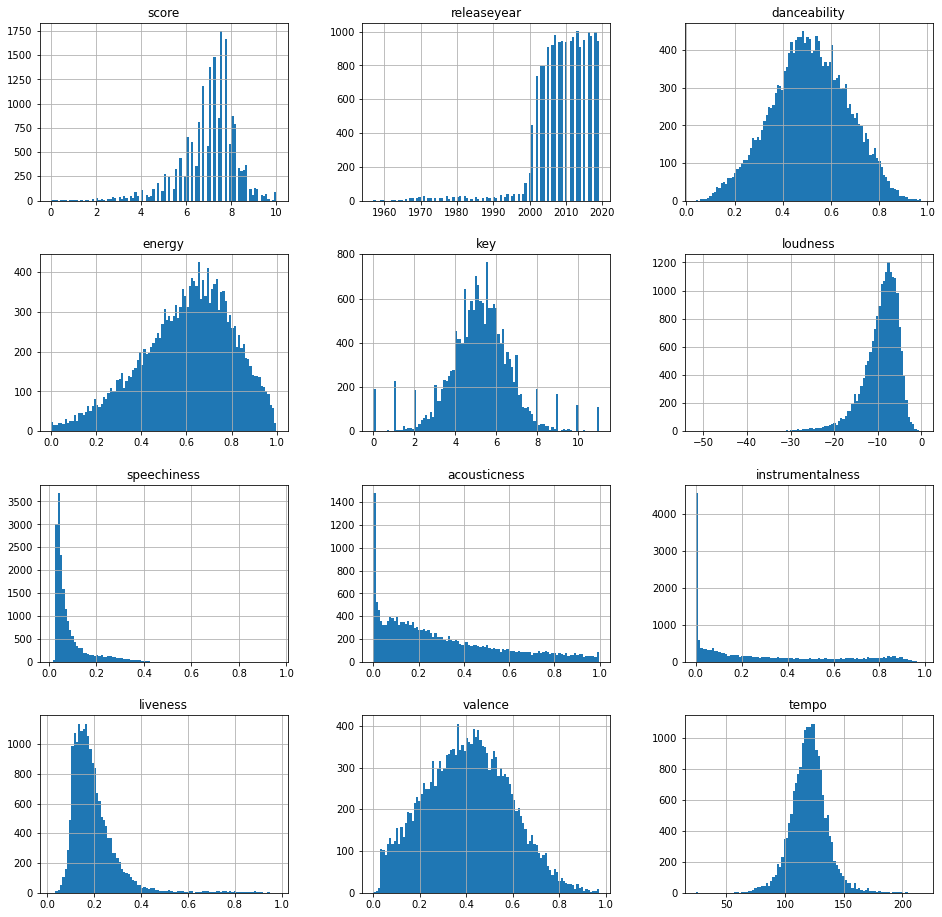

In [3]:
df.hist(bins=100, figsize=(16, 16))

In [4]:
df.groupby(by=["genre"]).mean()

,score,releaseyear,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
genre,,,,,,,,,,,,
Electronic,6.950424,2009.467133,0.549520,0.613179,5.230812,-9.901715,0.089853,0.277797,0.393099,0.189926,0.407283,121.341620
Experimental,7.370521,2009.179005,0.440247,0.549128,5.173335,-11.066744,0.088476,0.389700,0.414913,0.194798,0.321892,117.591664
Folk/Country,7.218717,2009.224185,0.489917,0.432933,5.217876,-11.328653,0.059226,0.547060,0.234428,0.170023,0.368790,117.715611
Global,7.392593,2008.080745,0.604127,0.630919,5.265143,-8.824250,0.093919,0.333800,0.223838,0.197470,0.581275,119.958435
Jazz,7.604965,2006.773381,0.473293,0.530955,5.307757,-11.514143,0.086607,0.421417,0.383124,0.204697,0.383320,113.995931
Metal,7.087139,2009.679045,0.373181,0.722048,5.294156,-8.060718,0.088977,0.154980,0.426114,0.217542,0.287738,122.347407
Pop/R&B,6.981972,2010.798600,0.574443,0.585715,5.250174,-8.657680,0.093550,0.302243,0.155119,0.187036,0.448027,118.338387
Rap,6.966363,2012.219170,0.648146,0.662178,5.258103,-7.514247,0.218658,0.216511,0.073929,0.226004,0.485023,117.583899
Rock,6.994171,2008.427127,0.485329,0.603567,5.188986,-8.929065,0.065823,0.299553,0.233101,0.196381,0.413693,121.895501


In [5]:
# score -> [0, 10]
# key   -> [0, inf)
# tempo -> [0, inf)

key_min = df["key"].min()
key_max = df["key"].max()

loudness_min = df["loudness"].min()
loudness_max = df["loudness"].max()

tempo_min = df["tempo"].min()
tempo_max = df["tempo"].max()

print(f"key      (min, max): {key_min:>12.4f} {key_max:>12.4f}")
print(f"loudness (min, max): {loudness_min:>12.4f} {loudness_max:>12.4f}")
print(f"tempo    (min, max): {tempo_min:>12.4f} {tempo_max:>12.4f}")
print()

key_range = key_max - key_min
loudness_range = loudness_max - loudness_min
tempo_range = tempo_max - tempo_min

print(f"key_range     : {key_range}")
print(f"loudness_range: {loudness_range}")
print(f"tempo_range   : {tempo_range}")

df["key"] = (df["key"] - key_min) / key_range
df["loudness"] = 1 - (df["loudness"] - loudness_min) / loudness_range
df["tempo"] = (df["tempo"] - tempo_min) / tempo_range

df.head(5)

key      (min, max):       0.0000      11.0000
loudness (min, max):     -51.7287      -0.0401
tempo    (min, max):      23.9833     215.9720

key_range     : 11.0
loudness_range: 51.688616667
tempo_range   : 191.98866667000001


,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,0.477273,0.108079,0.031983,0.724917,0.024493,0.165367,0.555083,0.403210
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,0.406417,0.369785,0.148624,0.647053,0.559133,0.527782,0.179465,0.435647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,0.402597,0.020302,0.055500,0.000253,0.751214,0.199071,0.552786,0.572493
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,0.518182,0.248234,0.028260,0.310325,0.224137,0.125150,0.451400,0.418623
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,0.377622,0.182167,0.170246,0.652462,0.012819,0.121131,0.281138,0.511165


In [6]:
columns = list(df.columns)
labels = list(range(2000, 2025, 5))

df_upper = df.copy()
df_under = df.copy()

df_upper = df_upper[df_upper["score"] > df_upper["score"].mean()]
df_under = df_under[df_under["score"] <= df_under["score"].mean()]

df_upper_grouped = df_upper.groupby(pd.cut(df_upper["releaseyear"], bins=labels, right=False)).mean()
df_under_grouped = df_under.groupby(pd.cut(df_under["releaseyear"], bins=labels, right=False)).mean()

releaseyear
[2000, 2005)    7.943543
[2005, 2010)    7.797202
[2010, 2015)    7.745733
[2015, 2020)    7.695060
Name: score, dtype: float64
releaseyear
[2000, 2005)    5.615084
[2005, 2010)    5.807821
[2010, 2015)    6.069785
[2015, 2020)    6.253940
Name: score, dtype: float64
/home/shane/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


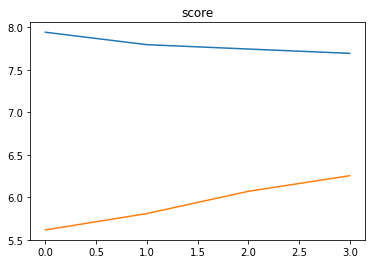

releaseyear
[2000, 2005)    0.506506
[2005, 2010)    0.495425
[2010, 2015)    0.492108
[2015, 2020)    0.509791
Name: danceability, dtype: float64
releaseyear
[2000, 2005)    0.526721
[2005, 2010)    0.513379
[2010, 2015)    0.517136
[2015, 2020)    0.545300
Name: danceability, dtype: float64


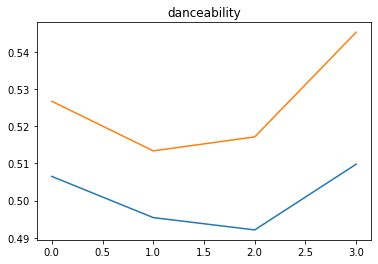

releaseyear
[2000, 2005)    0.577322
[2005, 2010)    0.597144
[2010, 2015)    0.614416
[2015, 2020)    0.578778
Name: energy, dtype: float64
releaseyear
[2000, 2005)    0.603499
[2005, 2010)    0.618763
[2010, 2015)    0.626549
[2015, 2020)    0.611733
Name: energy, dtype: float64


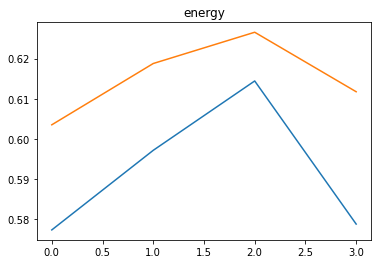

releaseyear
[2000, 2005)    0.470914
[2005, 2010)    0.475432
[2010, 2015)    0.477028
[2015, 2020)    0.472310
Name: key, dtype: float64
releaseyear
[2000, 2005)    0.476703
[2005, 2010)    0.476401
[2010, 2015)    0.479880
[2015, 2020)    0.466053
Name: key, dtype: float64


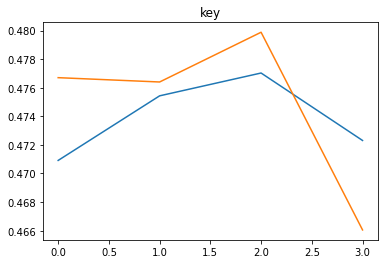

releaseyear
[2000, 2005)    0.193759
[2005, 2010)    0.180672
[2010, 2015)    0.177805
[2015, 2020)    0.187155
Name: loudness, dtype: float64
releaseyear
[2000, 2005)    0.179007
[2005, 2010)    0.168806
[2010, 2015)    0.168584
[2015, 2020)    0.168772
Name: loudness, dtype: float64


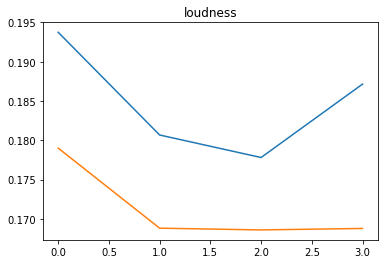

releaseyear
[2000, 2005)    0.094886
[2005, 2010)    0.085435
[2010, 2015)    0.090470
[2015, 2020)    0.099409
Name: speechiness, dtype: float64
releaseyear
[2000, 2005)    0.090208
[2005, 2010)    0.085953
[2010, 2015)    0.088130
[2015, 2020)    0.101931
Name: speechiness, dtype: float64


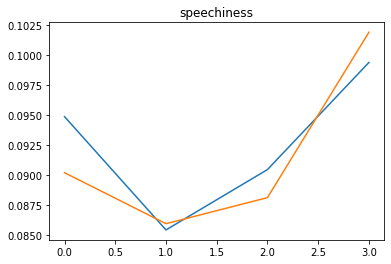

releaseyear
[2000, 2005)    0.325241
[2005, 2010)    0.324772
[2010, 2015)    0.298399
[2015, 2020)    0.328832
Name: acousticness, dtype: float64
releaseyear
[2000, 2005)    0.290747
[2005, 2010)    0.284778
[2010, 2015)    0.276456
[2015, 2020)    0.275533
Name: acousticness, dtype: float64


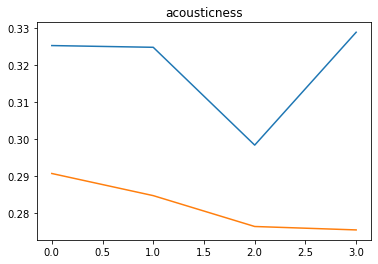

releaseyear
[2000, 2005)    0.301576
[2005, 2010)    0.281262
[2010, 2015)    0.329749
[2015, 2020)    0.297779
Name: instrumentalness, dtype: float64
releaseyear
[2000, 2005)    0.253162
[2005, 2010)    0.237860
[2010, 2015)    0.281814
[2015, 2020)    0.233065
Name: instrumentalness, dtype: float64


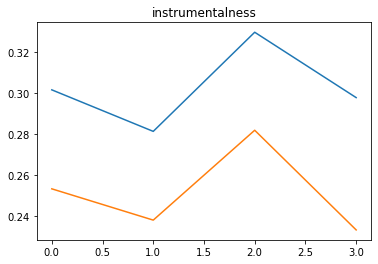

releaseyear
[2000, 2005)    0.197549
[2005, 2010)    0.201736
[2010, 2015)    0.198870
[2015, 2020)    0.192639
Name: liveness, dtype: float64
releaseyear
[2000, 2005)    0.195261
[2005, 2010)    0.201489
[2010, 2015)    0.197226
[2015, 2020)    0.190591
Name: liveness, dtype: float64


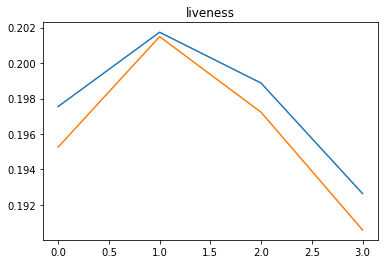

releaseyear
[2000, 2005)    0.403449
[2005, 2010)    0.408494
[2010, 2015)    0.383958
[2015, 2020)    0.375278
Name: valence, dtype: float64
releaseyear
[2000, 2005)    0.422865
[2005, 2010)    0.425413
[2010, 2015)    0.408360
[2015, 2020)    0.408967
Name: valence, dtype: float64


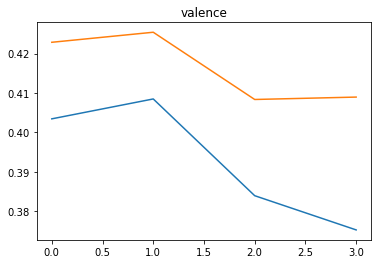

releaseyear
[2000, 2005)    0.499108
[2005, 2010)    0.500880
[2010, 2015)    0.502844
[2015, 2020)    0.497874
Name: tempo, dtype: float64
releaseyear
[2000, 2005)    0.502000
[2005, 2010)    0.506628
[2010, 2015)    0.505510
[2015, 2020)    0.503270
Name: tempo, dtype: float64


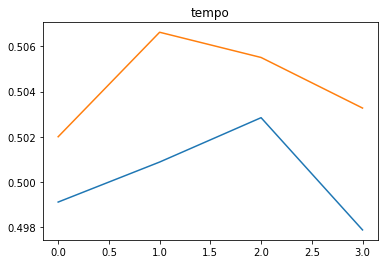

In [7]:
import matplotlib.pyplot as plt

columns = ["score", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

for column in columns:
    print(df_upper_grouped[column])
    print(df_under_grouped[column])

    plt.plot(df_upper_grouped[column])
    plt.plot(df_under_grouped[column])
    plt.title(column)

    plt.show()

In [8]:
"""
[Danceability]
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

[Acousticness]
A measure from 0.0 to 1.0 of whether the track is acoustic.

[Energy]
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

[Instrumentalness]
Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

[Liveness]
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

[Loudness]
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

[Speechiness]
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

[Tempo]
he overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

[Valence]
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
"""

# score -> [0, 10]
# key   -> [0, inf) -> [0, 1]
# tempo -> [0, inf) -> [0, 1]

c = columns.copy()
c.remove("score")

y_values = {}
x_label = []
first = True
for column in c:
    print(column)
    series = abs(df_upper_grouped[column] - df_under_grouped[column])
    temp = []
    for i, value in series.iteritems():
        temp.append(value)
        if first:
            x_label.append(str(i))
        print(i, value)
    y_values[column] = temp
    first = False
    print()

danceability
[2000, 2005) 0.02021535024083032
[2005, 2010) 0.017953511845469672
[2010, 2015) 0.025028398136660246
[2015, 2020) 0.03550875526455255

energy
[2000, 2005) 0.026176985987585777
[2005, 2010) 0.02161893197382636
[2010, 2015) 0.01213237155561786
[2015, 2020) 0.03295449333676781

key
[2000, 2005) 0.005788671095528886
[2005, 2010) 0.0009687121047370351
[2010, 2015) 0.002851939338272158
[2015, 2020) 0.006256989162132298

loudness
[2000, 2005) 0.014751244332933289
[2005, 2010) 0.011866517040776431
[2010, 2015) 0.009221007979650697
[2015, 2020) 0.018382695505166136

speechiness
[2000, 2005) 0.0046774686993486525
[2005, 2010) 0.0005183011276296001
[2010, 2015) 0.0023400201029824957
[2015, 2020) 0.0025218369765401677

acousticness
[2000, 2005) 0.03449382304959736
[2005, 2010) 0.03999368669098097
[2010, 2015) 0.02194330128524208
[2015, 2020) 0.05329948051971106

instrumentalness
[2000, 2005) 0.048414554803443643
[2005, 2010) 0.04340221680445938
[2010, 2015) 0.04793505761216815
[2015, 

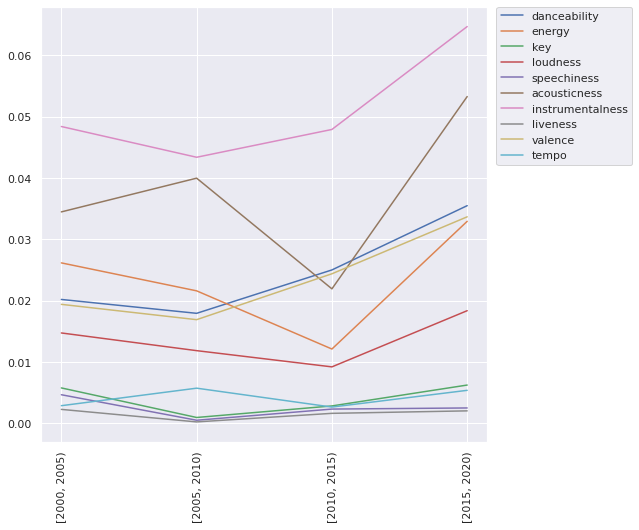

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.set_theme(style="darkgrid")

c = columns.copy()
c.remove("score")
for column in c:

    x = x_label
    y = y_values[column]

    sns.lineplot(x=x, y=y, label=column)

plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()